In [2]:
import pandas as pd
file_path = '/home/abrar/Desktop/Code/Temporal HPC/pm100_job _w_data_avg_power.csv'

# Read the second sheet (index 1, since indexing starts at 0)
df = pd.read_csv(file_path)

# Now 'df' contains the data from the second sheet

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231125 entries, 0 to 231124
Data columns (total 41 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   cores_alloc_layout      231125 non-null  object 
 1   cores_allocated         231125 non-null  object 
 2   cores_per_task          231125 non-null  int64  
 3   derived_ec              231125 non-null  object 
 4   eligible_time           231125 non-null  object 
 5   end_time                231125 non-null  object 
 6   group_id                231125 non-null  int64  
 7   job_id                  231125 non-null  int64  
 8   job_state               231125 non-null  object 
 9   nodes                   231125 non-null  object 
 10  num_cores_req           231125 non-null  int64  
 11  num_cores_alloc         231125 non-null  int64  
 12  num_nodes_req           231125 non-null  int64  
 13  num_nodes_alloc         231125 non-null  int64  
 14  num_tasks           

In [15]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns



# # Convert 'end_time' and 'start_time' to datetime objects
# df['end_time'] = pd.to_datetime(df['end_time'])
# df['start_time'] = pd.to_datetime(df['start_time'])

# # Calculate the duration in minutes
# df['duration_minutes'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 60

# # Define the job exit states
# job_exit_states = {
#     'COMPLETED': 'COMPLETED',
#     'FAILED': 'FAILED',
#     'CANCELLED': 'CANCELLED',
#     'TIMEOUT': 'TIMEOUT',
#     'OOM+NODE FAIL': ['OUT_OF_MEMORY', 'NODE_FAIL']  # Assuming these represent OOM+NODE FAIL
# }

# # Map job states to the defined categories
# def map_job_state(state):
#     for key, value in job_exit_states.items():
#         if isinstance(value, list):
#             if state in value:
#                 return key
#         elif state == value:
#             return key
#     return 'OTHER'  # You can categorize other states as needed

# df['mapped_job_state'] = df['job_state'].apply(map_job_state)

# # Create the plot
# plt.figure(figsize=(8, 6))
# sns.set_style("whitegrid")

# # Define colors for each job exit state
# colors = {
#     'COMPLETED': 'steelblue',
#     'FAILED': 'goldenrod',
#     'CANCELLED': 'mediumseagreen',
#     'TIMEOUT': 'sienna',
#     'OOM+NODE FAIL': 'plum'
# }

# # Group data by duration (in bins) and job exit state, then count the number of jobs
# duration_bins = range(0, int(df['duration_minutes'].max()) + 50, 50)
# grouped_data = df.groupby([pd.cut(df['duration_minutes'], duration_bins), 'mapped_job_state'])['job_id'].count().unstack()

# # Plot the bar chart with logarithmic y-axis
# grouped_data.plot(kind='bar', stacked=False, width=0.8, color=[colors.get(x, 'gray') for x in grouped_data.columns], logy=True, ax=plt.gca())

# # Set the labels and title
# plt.xlabel('Duration (in minutes)', fontsize=14)
# plt.ylabel('Number of jobs', fontsize=14)

# # Customize the legend
# legend_labels = [label for label in grouped_data.columns if label in colors]
# plt.legend(legend_labels, title='Job exit state', loc='upper right', fontsize=12)

# # Adjust x-axis ticks for better readability
# # Get the current x-tick labels (which are the bin ranges)
# current_xticks = plt.gca().get_xticks()
# current_xticklabels = [label.get_text() for label in plt.gca().get_xticklabels()]

# # Choose a subset of ticks to display (e.g., every 5th tick)
# # Example: Display every 3rd tick, starting from the first one
# selected_xticks = current_xticks[::3]
# selected_xticklabels = current_xticklabels[::3]

# # If you want to display integer values on the x-axis, you can extract the lower bound of each bin
# # and use them as tick labels:
# integer_xticklabels = [int(label[1:].split(',')[0]) for label in selected_xticklabels]

# # Set the new x-ticks and labels
# plt.xticks(selected_xticks, integer_xticklabels, rotation=0)

# # Show the plot
# plt.tight_layout()
# plt.show()

/tmp/ipykernel_26985/3099922219.py:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby([pd.cut(df['duration_minutes'], duration_bins), 'mapped_job_state'])['job_id'].count().unstack()


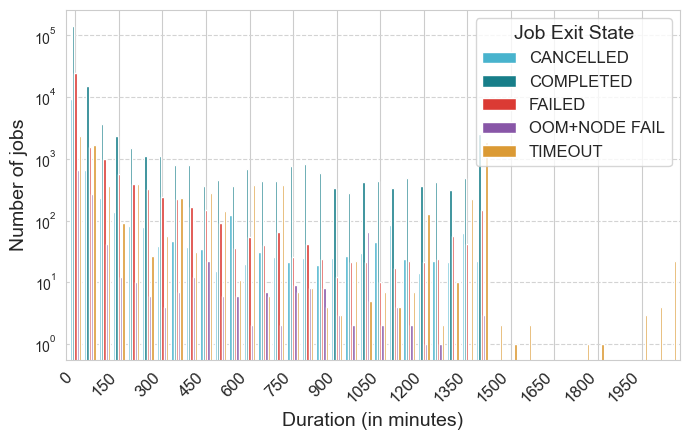

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the font and overall styling
plt.rcParams['font.family'] = 'Gill Sans'
sns.set_style("whitegrid")

# Convert 'end_time' and 'start_time' to datetime objects
df['end_time'] = pd.to_datetime(df['end_time'])
df['start_time'] = pd.to_datetime(df['start_time'])

# Calculate the duration in minutes
df['duration_minutes'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 60

# Define the job exit states
job_exit_states = {
    'COMPLETED': 'COMPLETED',
    'FAILED': 'FAILED',
    'CANCELLED': 'CANCELLED',
    'TIMEOUT': 'TIMEOUT',
    'OOM+NODE FAIL': ['OUT_OF_MEMORY', 'NODE_FAIL']  # Assuming these represent OOM+NODE FAIL
}

# Map job states to the defined categories
def map_job_state(state):
    for key, value in job_exit_states.items():
        if isinstance(value, list):
            if state in value:
                return key
        elif state == value:
            return key
    return 'OTHER'  # You can categorize other states as needed

df['mapped_job_state'] = df['job_state'].apply(map_job_state)

# Create the plot with matched dimensions
fig, ax = plt.subplots(figsize=(7, 4.5))

# Define colors for each job exit state
colors = {
    'COMPLETED': '#177e89',
    'FAILED': '#db3a34',
    'CANCELLED': '#48b3cd',
    'TIMEOUT': '#db9a34',
    'OOM+NODE FAIL': '#8856a7'
}

# Group data by duration (in bins) and job exit state, then count the number of jobs
duration_bins = range(0, int(df['duration_minutes'].max()) + 50, 50)
grouped_data = df.groupby([pd.cut(df['duration_minutes'], duration_bins), 'mapped_job_state'])['job_id'].count().unstack()

# Plot the bar chart with logarithmic y-axis
grouped_data.plot(
    kind='bar',
    stacked=False,
    width=0.8,
    color=[colors.get(x, 'gray') for x in grouped_data.columns],
    logy=True,
    ax=ax
)

# Set the labels and title
ax.set_xlabel('Duration (in minutes)', fontsize=14)
ax.set_ylabel('Number of jobs', fontsize=14)

# Customize the legend
legend_labels = [label for label in grouped_data.columns if label in colors]
ax.legend(
    legend_labels,
    title='Job Exit State',
    loc='upper right',
    fontsize=12,
    title_fontsize=14
)

# Adjust x-axis ticks for better readability
# Get the current x-tick labels (which are the bin ranges)
current_xticks = ax.get_xticks()
current_xticklabels = [label.get_text() for label in ax.get_xticklabels()]

# Choose a subset of ticks to display (e.g., every 3rd tick)
selected_xticks = current_xticks[::3]
selected_xticklabels = current_xticklabels[::3]

# If you want to display integer values on the x-axis, you can extract the lower bound of each bin
integer_xticklabels = [int(label[1:].split(',')[0]) for label in selected_xticklabels]

# Set the new x-ticks and labels
ax.set_xticks(selected_xticks)
ax.set_xticklabels(integer_xticklabels, rotation=45, ha='right', fontsize=12)

# Add gridlines for clarity
ax.grid(axis='y', color='lightgrey', linestyle='dashed', zorder=0)

# Tight layout and save
plt.tight_layout()
plt.savefig("duration_vs_jobs.pdf", bbox_inches='tight')

# Show the plot
plt.show()


/tmp/ipykernel_26985/1820664357.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby([pd.cut(df['duration_minutes'], duration_bins), 'mapped_job_state'])['job_id'].count().unstack()


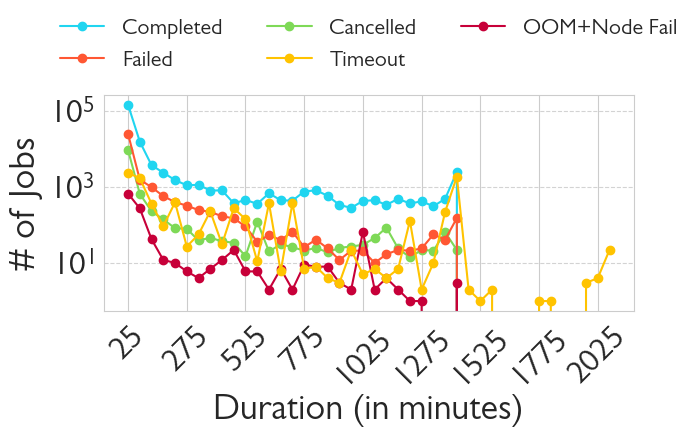

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define color palette for job states
colors = {
    'COMPLETED': '#20D5F0',
    'FAILED': '#FF5733',
    'CANCELLED': '#7ED957',
    'TIMEOUT': '#FFC300',
    'OOM+NODE FAIL': '#C70039'
}

# Desired legend order
legend_order = ['COMPLETED', 'FAILED', 'CANCELLED', 'TIMEOUT', 'OOM+NODE FAIL']

# Group data by duration (in bins) and job exit state, then count the number of jobs
duration_bins = range(0, int(df['duration_minutes'].max()) + 50, 50)
grouped_data = df.groupby([pd.cut(df['duration_minutes'], duration_bins), 'mapped_job_state'])['job_id'].count().unstack()

# Create the plot
plt.figure(figsize=(7, 4.5))  # Adjusted figure dimensions
lines = []  # Store line objects for custom legend ordering
for state in grouped_data.columns:
    line, = plt.plot(
        grouped_data.index.map(lambda x: x.mid),  # Midpoints of bins
        grouped_data[state],
        label=state,
        color=colors.get(state, 'gray'),
        marker='o',
        linewidth=1.5  # Thicker lines for better visibility
    )
    lines.append(line)  # Store the line object

# Add labels and customize
plt.xlabel('Duration (in minutes)', fontsize=26)
plt.ylabel('# of Jobs', fontsize=26)
plt.tick_params(axis='both', which='major', labelsize=24)

# Customize x-axis ticks (use bin midpoints for better representation)
x_tick_locations = grouped_data.index.map(lambda x: x.mid)[::5]  # Show every 5th tick
plt.xticks(
    x_tick_locations,  # Reduced number of ticks
    labels=[f'{int(x)}' for x in x_tick_locations],  # Format as integers
    rotation=45
)

# Use log scale for the y-axis
plt.yscale('log')

# Add gridlines
plt.grid(which='both', axis='y', color='lightgrey', linestyle='dashed', zorder=0)

# Reorder the legend based on the desired order
# Reorder the legend based on the desired order
ordered_lines = [lines[grouped_data.columns.tolist().index(state)] for state in legend_order]
ordered_labels = [
    'Completed', 
    'Failed', 
    'Cancelled', 
    'Timeout', 
    'OOM+Node Fail'  # Explicitly format "OOM" as uppercase
]

plt.legend(
    handles=ordered_lines,
    labels=ordered_labels,
    title_fontsize=18,
    fontsize=16,
    loc='lower center',
    bbox_to_anchor=(0.5, 1.02),  # Centered above the plot
    ncol=3,  # Arrange legend items in 3 columns
    frameon=False
)

# Tight layout and save
plt.tight_layout()
plt.savefig("job_exit_state_trends_over_duration.pdf", bbox_inches='tight')

# Show the plot
plt.show()


/tmp/ipykernel_26985/468781485.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(


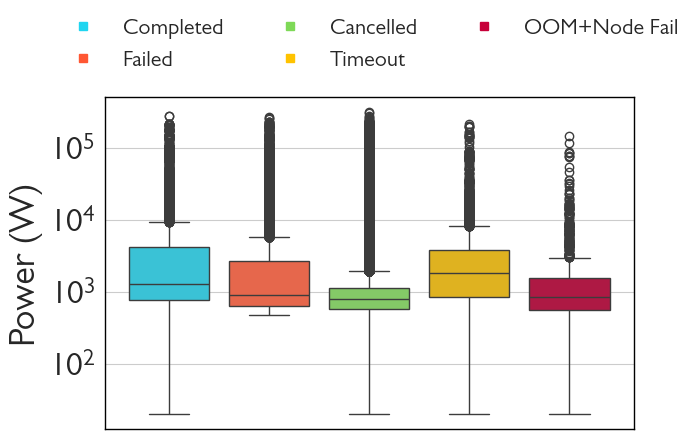

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the font and overall styling
plt.rcParams['font.family'] = 'Gill Sans'

# Calculate total power consumption if not already calculated
df['total_power_consumption'] = df['mean_node_power']  # Adjust column names as needed

# Determine dynamic y-axis limits
y_min = df['total_power_consumption'].min()
y_max = df['total_power_consumption'].max()

# Create the plot with adjusted aesthetics
fig, ax = plt.subplots(figsize=(7, 4.5))
boxplot = sns.boxplot(
    x='mapped_job_state', 
    y='total_power_consumption', 
    data=df, 
    ax=ax, 
    palette=['#20D5F0', '#FF5733', '#7ED957', '#FFC300', '#C70039']  # Custom colors for each state
)
colors = {
    'COMPLETED': '#20D5F0',
    'FAILED': '#FF5733',
    'CANCELLED': '#7ED957',
    'TIMEOUT': '#FFC300',
    'OOM+NODE FAIL': '#C70039'
}

# Hide x-axis ticks and labels
ax.set_xticks([])
ax.set_xlabel('')  # Remove x-axis label

# Add a legend for the job states
legend_labels = ['Completed', 'Failed', 'Cancelled', 'Timeout', 'OOM+Node Fail']
legend_colors = ['#20D5F0', '#FF5733', '#7ED957', '#FFC300', '#C70039']

# # Define color palette for job states
# colors = {
#     'COMPLETED': '#20D5F0',
#     'FAILED': '#FF5733',
#     'CANCELLED': '#7ED957',
#     'TIMEOUT': '#FFC300',
#     'OOM+NODE FAIL': '#C70039'
# }

# Add custom legend
for label, color in zip(legend_labels, legend_colors):
    ax.plot([], [], label=label, color=color, marker='s', linestyle='')

# Add legend to appear at the upper center
plt.legend(
    title_fontsize=18, 
    fontsize=16, 
    loc='lower center', 
    bbox_to_anchor=(0.5, 1.02),  # Centered above the plot
    ncol=3,  # Arrange legend items in 3 columns
    frameon=False
)
# Add labels and customize
ax.set_ylabel('Power (W)', fontsize=26)
ax.tick_params(axis='both', which='major', labelsize=24)

# Add gridlines for the y-axis
# ax.grid(which='both', axis='y', color='lightgrey', linestyle='dashed', zorder=0)

# Adjust the thickness of the outer border (spines)
for spine in ax.spines.values():
    spine.set_linewidth(1)  # Set the desired thickness (e.g., 2 for thicker borders)
    spine.set_edgecolor('black')  # Change to desired color (e.g., 'black', '#333333')

# Consider log scale if data is heavily skewed
ax.set_yscale('log')

# Tight layout and save
plt.tight_layout()
plt.savefig("power_consumption_by_job_state.pdf", bbox_inches='tight')

# Show the plot
plt.show()


/tmp/ipykernel_26985/2682440136.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='mapped_job_state', y='total_power_consumption', data=df, palette=colors)


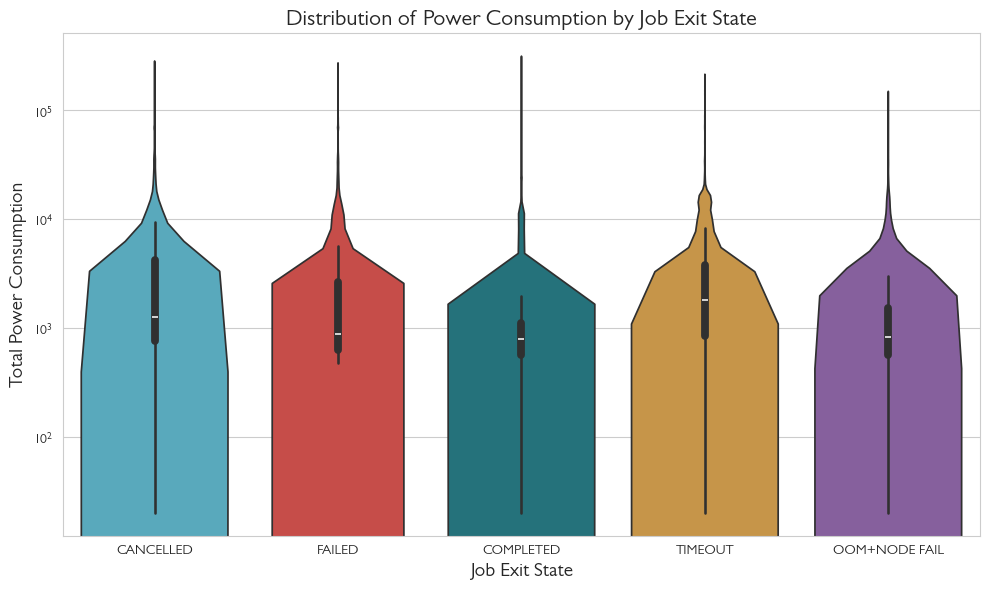

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Load data, map job states, calculate total power consumption as needed) ...

plt.figure(figsize=(10, 6))
sns.violinplot(x='mapped_job_state', y='total_power_consumption', data=df, palette=colors)
plt.xlabel('Job Exit State', fontsize=14)
plt.ylabel('Total Power Consumption', fontsize=14)
plt.title('Distribution of Power Consumption by Job Exit State', fontsize=16)

# Consider a log scale if the data is heavily skewed:
plt.yscale('log')

plt.tight_layout()
plt.show()

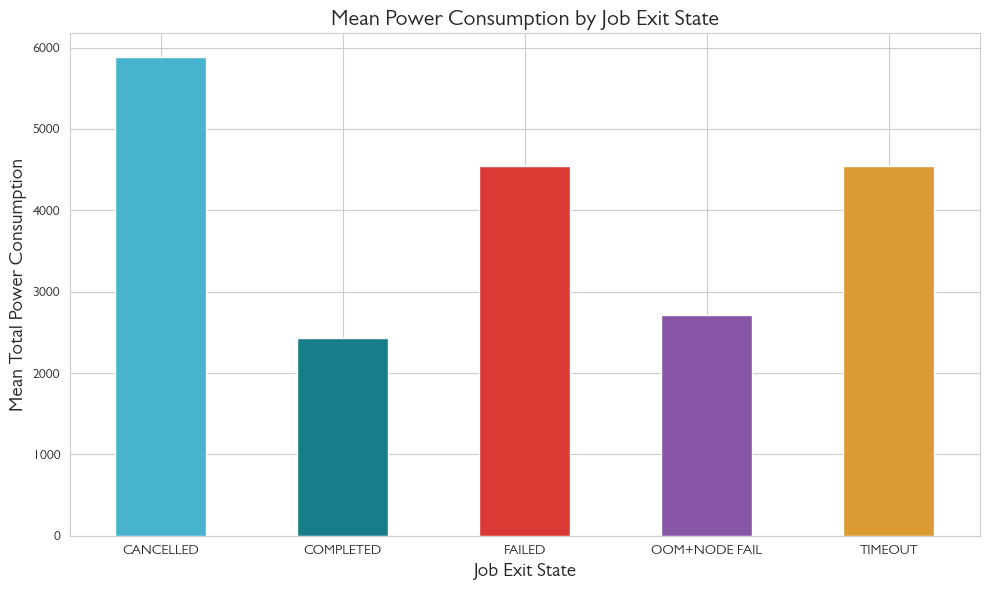

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Load data, map job states, calculate total power consumption as needed) ...

# Calculate mean power consumption for each state
mean_power_by_state = df.groupby('mapped_job_state')['total_power_consumption'].mean()

plt.figure(figsize=(10, 6))
mean_power_by_state.plot(kind='bar', color=[colors.get(x, 'gray') for x in mean_power_by_state.index])
plt.xlabel('Job Exit State', fontsize=14)
plt.ylabel('Mean Total Power Consumption', fontsize=14)
plt.title('Mean Power Consumption by Job Exit State', fontsize=16)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

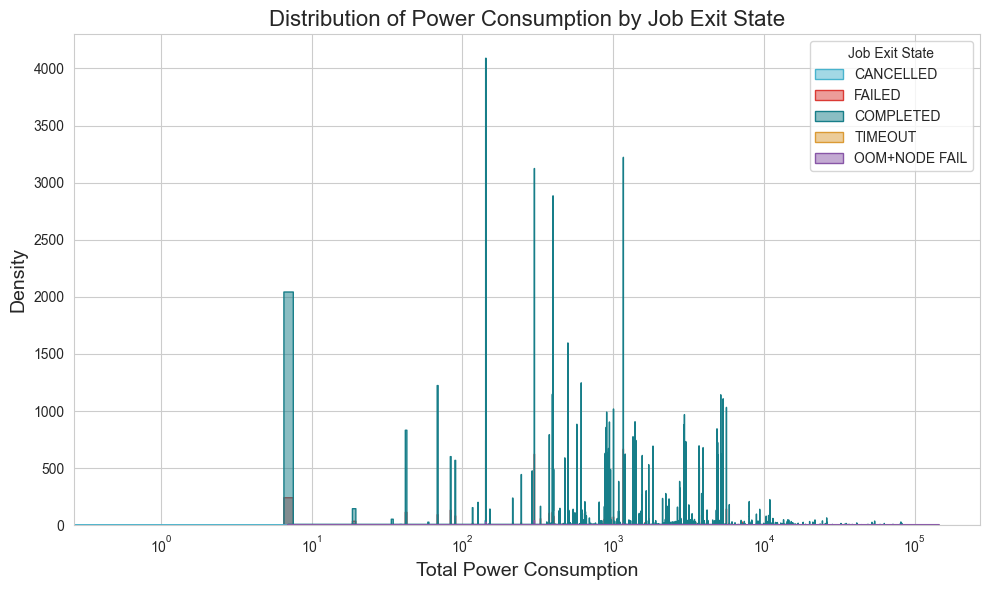

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Load data, map job states, calculate total power consumption as needed) ...

plt.figure(figsize=(10, 6))
for state in df['mapped_job_state'].unique():
    sns.histplot(df[df['mapped_job_state'] == state]['total_power_consumption'], label=state, color=colors.get(state, 'gray'), kde=True, element="step")  # Use kde=True for KDE plot

plt.xlabel('Total Power Consumption', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Power Consumption by Job Exit State', fontsize=16)
plt.legend(title='Job Exit State')

# Consider a log scale if the data is heavily skewed:
plt.xscale('log')

plt.tight_layout()
plt.show()